<div style="text-align: justify; padding:5px; background-color:rgb(252, 253, 255); border: 1px solid lightgrey; padding-left: 1em; padding-right: 1em;">
    <font color='red'>Mini Jupyter tutorial<br><br>To run each cell, click the cell and press <kbd>Run</kbd> from the menu bar. This will run any Python code or display any text within the selected cell before highlighting the next cell down. There are two types of cell: A <i>text cell</i> of type <kbd>Markdown</kbd> or <kbd>Heading</kbd> and a <i>code cell</i> of type <kbd>Code</kbd> identifiable with the <span style="font-family: courier; color:black; background-color:white;">In[ ]:</span> to the left of the cell</i>. The type of cell is also identifiable from the dropdown menu in the above menu bar to the right of <kbd>Run</kbd>. Any visual results produced by the code (text/figures) are displayed directly below that cell. Press <kbd>Run</kbd> again until you reach the end of the notebook or alternatively click <kbd>Kernel</kbd><font color='black'>→</font><kbd>Restart and Run All</kbd>. Should the Jupyter notebook crash for any reason, restart the Jupyter Kernel by clicking <kbd>Kernel</kbd><font color='black'>→</font><kbd>Restart</kbd>, and start again from the top.
        
</div>

# Tutorial 5: Metabolomics Spring-embedded Network Workflow

<p style="text-align: justify">
<br><br>
This tutorial covers the necessary steps for producting both a static and interactive spring-embedded network plot.
</p>

<div style="text-align: justify; padding:5px; background-color:rgb(252, 253, 255); border: 1px solid lightgrey; padding-left: 1em; padding-right: 1em;">
    <font color='red', size=4>Disclaimer: It is assumed that any data used with this workflow has been cleaned and any missing values either removed or imputed, as this workflow does not perform data cleaning or missing value removal/imputation. 
    <br/><br/>
    <font color='red', size=4>Note: Within your browser please allow pop-ups from localhost if running locally or mybinder.org if running from Binder, as the final interative plot may fail to display otherwise.
</div>   

<div style="background-color:rgb(255, 250, 250); padding:2px; padding-left: 1em; padding-right: 1em;">
    
<h2 id="1importpackagesmodules" style="text-align: justify">1. Import Packages/Modules</h2>

<p style="text-align: justify">The first code cell of this tutorial imports <a href="https://docs.python.org/3/tutorial/modules.html"><em>packages</em> and <em>modules</em></a> into the Jupyter environment. <em>Packages</em> and <em>modules</em> provide additional functions and tools beyond the in-built Python modules.
<br></p>
<br>
All the code embedded in this notebook is written using Python (<a href="http://www.python.org">python.org</a>) and JavaScript (<a href="https://www.javascript.com/">javascript.com</a>) and are built upon popular open source packages such as Networkx (<a href="https://networkx.github.io/">networkx.github.io</a>), NumPy (<a href="https://numpy.org/">numpy.org</a>), SciPy (<a href="https://www.scipy.org/">scipy.org</a>), Matplotlib (<a href="https://matplotlib.org/">matplotlib.org</a>), Pandas (<a href="https://pandas.pydata.org/">pandas.pydata.org</a>) and D3 JavaScript (<a href="https://d3js.org/">d3js.org</a>).
    
<em>Note:</em> a tutorial focusing on the python programming language is beyond the scope of this notebook. To learn how to program in Python with Jupyter Notebook please refer to: 
<a href="https://mybinder.org/v2/gh/jakevdp/PythonDataScienceHandbook/master?filepath=notebooks%2FIndex.ipynb">Python Data Science Handbook (Jake VanderPlas, 2016)</a>.

In [1]:
import os
   
home = os.getcwd() + "/"

import numpy as np
import pandas as pd
from IPython.display import Javascript, display
from sklearn.preprocessing import StandardScaler
import multivis
#print('All packages successfully loaded')

%load_ext autoreload
%autoreload 2

<div style="background-color:rgb(255, 250, 250); padding:5px; padding-left: 1em; padding-right: 1em;">

<h2 style="text-align: justify">2. Load Data and Peak sheet</h2>

<p style="text-align: justify">The code cell below loads the <em>Data</em> and <em>Peak</em> sheets from an Excel file using <code>loadData()</code>. When this is complete, you should see confirmation that Peak (the Peak worksheet) and Data (the Data worksheet) tables have been loaded.<br><br>

This dataset has previously been published in (<a href="https://physoc.onlinelibrary.wiley.com/doi/full/10.1113/EP087159">Lawler et al. (2018)</a>) in <i>Experimental Physiolgy</i> and has been put into a standardised <a href="https://en.wikipedia.org/wiki/Tidy_data">Tidy Data</a> format.
</p>
    
Further information on the publication with a link to the data repository can be found here: Project ID <a href="XXX">XXX</a>). 

Please inspect the <a href="Data.xlsx">Excel file</a> before using it in this tutorial to understadn its structure. To change the dataset to be loaded into the notebook replace <code>filename = 'Data.xlsx'</code> with another file with the same <a href="https://en.wikipedia.org/wiki/Tidy_data">Tidy Data</a> format as <a href="Data.xlsx">Data.xlsx</a>, and then rerun the workflow.

</div></div>

In [2]:
file = 'NathanDataPub.xlsx'

DataTable,PeakTable = multivis.utils.loadData(home + file, DataSheet='Data', PeakSheet='Peak')

Loading sheet: Peak
Loading sheet: Data
TOTAL SAMPLES: 29 TOTAL PEAKS: 32
Done!


<div style="background-color:rgb(255, 250, 250); padding:5px;  border: 1px solid lightgrey; padding-left: 1em; padding-right: 1em;">

### Display the Data sheet

Check the imported Data table simply by calling the function <span style="font-family: monaco; font-size: 14px; background-color:white;">display(DataTable)</span><br>
</div>

In [3]:
display(DataTable)

,Idx,Class,Subject,M1,M2,M3,M4,M5,M6,M7,...,M23,M24,M25,M26,M27,M28,M29,M30,M31,M32
1,1,Day1,ID#8,11869.885789,7928.191086,10435.615600,24274.490844,1.652528e+06,5.527597e+05,3302.626974,...,8821.868440,45452.021662,8.422674e+05,35812.954717,11908.058199,58304.192636,76229.516925,698.829269,6.152166e+06,3.011384e+05
2,2,Day3,ID#9,6091.032382,336302.294432,7583.153313,15992.455361,1.014382e+06,5.398275e+05,2561.396590,...,7070.409466,23748.717737,5.969310e+05,43209.005653,1614.750726,17107.605509,33792.399242,5219.808748,3.844697e+06,3.876507e+05
3,3,Day14,ID#10,8304.840762,91992.628406,15463.843074,17243.287685,1.261087e+06,6.358351e+05,2579.520637,...,6189.891266,62171.092488,4.617908e+05,19891.976258,5787.252806,21196.689803,49518.409732,6917.767103,3.642466e+06,3.085592e+06
4,4,Day1,ID#4,5679.245738,103604.360972,11726.584477,18997.946320,1.730119e+06,8.018186e+05,1862.338814,...,14710.768208,29470.036797,6.338633e+05,54690.964915,6119.355667,34562.628959,25722.056666,82857.001884,6.507678e+06,4.544997e+05
5,5,Day3,ID#3,7927.719880,377994.409342,37252.855940,23070.362098,2.172443e+06,8.122617e+05,2368.612424,...,8373.694858,70177.184112,5.764836e+05,119391.571698,5831.690401,11314.289830,27222.497589,8780.422655,5.452713e+06,3.675841e+05
6,6,Day14,ID#3,4074.580486,9234.118904,2883.602638,27252.577493,1.694014e+06,3.198403e+05,2436.745786,...,17175.921137,43648.210575,3.669026e+05,41311.727090,20909.038093,14625.381528,61184.204465,2386.211484,3.958768e+06,7.036890e+05
7,7,Day3,ID#2,7120.333141,98285.350473,14214.077514,24997.653286,1.421475e+06,6.981114e+05,3576.187472,...,11930.411039,33482.365703,7.695907e+05,17285.765486,4002.855161,18389.688133,54971.306524,1266.178495,4.396494e+06,5.522302e+05
8,8,Day3,ID#4,8103.250066,31683.902081,8928.894882,20545.072813,1.655281e+06,3.886826e+05,3023.746753,...,9760.323565,24682.407167,6.951134e+05,33854.620792,5749.788807,13098.908274,32455.790304,13672.154888,3.771656e+06,1.186001e+06
9,9,Day14,ID#8,8273.693156,382598.960254,4154.972730,22212.782829,1.891639e+06,8.915732e+05,2310.807344,...,11142.048186,50927.179351,6.828179e+05,169428.675064,5179.873860,14255.030832,63933.849462,2019.496191,3.703559e+06,4.964483e+05
10,10,Day3,ID#10,6690.535074,98946.804580,5388.740427,14757.880513,1.370226e+06,6.644797e+05,2577.400534,...,10905.284099,30077.046114,6.620947e+05,44494.246759,5019.971982,9310.215496,32246.148489,455.958833,3.207303e+06,3.559986e+05


<div style="background-color:rgb(255, 250, 250); padding:5px;  border: 1px solid lightgrey; padding-left: 1em; padding-right: 1em;">

### Display the Peak sheet

Check the imported Peak table  simply by calling the function <span style="font-family: monaco; font-size: 14px; background-color:white;">display(PeakTable)</span><br>
</div>

In [4]:
display(PeakTable)

,Idx,Name,Label,Mode,mz,rt,F,pvalue,pFDR,RSD,Dratio
1,1,M1,Ocatanedioic acid,Negative,173.081494,528.5930,1.205805,0.316809,0.290529,10.471229,2.887221
2,2,M2,Glycoursodeoxycholic acid,Negative,448.304880,1158.7500,6.674117,0.007382,0.079750,4.706839,24.314863
3,3,M3,Dodecanedioc acid,Negative,229.143848,966.4710,3.659888,0.079039,0.191246,19.856452,3.216742
4,4,M4,Succinic Acid,Negative,117.019323,133.4985,0.415028,0.626102,0.341498,5.577582,4.025602
5,5,M5,Citric Acid,Negative,191.019367,109.5440,0.741641,0.435266,0.311669,9.170874,2.417115
6,6,M6,Lactic Acid,Negative,89.025122,84.3630,4.928634,0.020552,0.111017,10.341807,2.332534
7,7,M7,5-Hydroxytryptophan,Negative,219.076809,217.4930,1.254299,0.303983,0.286883,16.876721,1.564374
8,8,M8,Glycocholic acid,Negative,464.299632,979.1600,7.626280,0.005556,0.076033,11.902311,7.463177
9,9,M9,L-Tryptophan,Negative,203.082155,337.8890,1.335823,0.287394,0.284528,4.289423,3.480650
10,10,M10,Hexadecanedioic acid,Negative,285.205730,1344.6100,0.554782,0.543473,0.328267,9.537188,4.942172


<div style="background-color:rgb(255, 250, 250); padding:10px;  border: 1px solid lightgrey; padding-left: 1em; padding-right: 1em;">

## 3. Log transform and scale values

Transformation can be done with a log which is commonly used for biological data types, however there are other types such as square, square root, cube root or reciprocal transformation, which may be suitable for other types of data. Scaling is highly dependent on the values found in the dataset. If the dataset contains a number of values which are very large compared to the majority of other values, then this may skew the data in favour of those values and consequently bias the results. Scaling methods such as unit variance and pareto scaling scale all the values in the dataset so that they all values are comparable. Pearson correlation, a parametric method, is performed next where a log is necessary to normally distribute the data. However, if a non-parametric method was used, such as Spearman or Kendall's Tau, then log is not necessary. Additionally, also in this case no scaling is necessary after log transformation, as correlation analysis does not require scaling, as covariance is measured between individual values in the bivariate correlation analysis, unlike with PCA in tutorial 1, which performs multivariate analysis, measuring the variance across all values. However, if another similarity metric were to be used in place of correlation, such as Euclidean distance, then scaling may be a necessary step to take.

</div>

In [5]:
peaklist = PeakTable['Name']                   # Set peaklist to the metabolite names in the DataTableClean
X = DataTable[peaklist].values                           # Extract X matrix from DataTable using peaklist
Xlog = np.log10(X)                                  # Log transform (base-10)
#Xscale = scaler.fit_transform(Xlog)                # Scale to unit variance (not necessary if later performing correlation analysis)

X_data = pd.DataFrame(Xlog, columns=peaklist)

<div style="background-color:rgb(255, 250, 250); padding:10px;  border: 1px solid lightgrey; padding-left: 1em; padding-right: 1em;">

## 5. Correlation analysis

Correlation is a form of similarity and measures the strength of the linear relationship between two variables. Pearson's correlation, a form of parametric correlation analysis, is described mathematically by dividing the joint variability or covariance of two variables by the product of their standard deviations (see Eq1). Other forms of correlation measure the monotonic relationships and are non-parametric, such as Spearman’s rank correlation and Kendall Tau's correlation. The following correlation analysis, allows for Pearson, Spearman or Kendall Tau's correlation analysis.

\begin{equation*}
r = \frac{Cov(X,Y)}{SD(X).SD(Y)}
\end{equation*}
<center>Eq1: Pearson’s correlation coefficient</center>

</div>

In [6]:
correlationType = "pearson" #"spearman"; "kendalltau"

X = X_data[PeakTable['Name']]

Scores,Pvalues = multivis.utils.corrAnalysis(X, correlationType)

100%|██████████| 32/32 [00:00<00:00, 217.10it/s]


<div style="background-color:rgb(255, 250, 250); padding:10px;  border: 1px solid lightgrey; padding-left: 1em; padding-right: 1em;">

## 6.  Generate Network

The similarities are filtered and put in a dataframe of edges, where nodes represent metabolites and edges represent similarity scores (correlation coefficients), with included node names, labels, colours, similarity scores and pvalues. The dataframe of edges is then passed into a NetworkX graph.

</div>

In [7]:
network = multivis.Network(peaktable=PeakTable, similarities=Scores, pvalues=Pvalues)

#general_params = dict({'filterScoreType': 'Pvalue'
#               , 'hard_threshold': 0.001
#               , 'link_type': 'Score'
#               , 'sign': 'pos'})

node_params = dict({'node_color_column': 'pvalue'    #If node_color_column set to colour values it overides the use of node_cmap
                   , 'node_cmap': 'Set1'})           #The colour map of the nodes

general_params = dict({'filterScoreType': 'Pvalue'   #The filer type to use for the similarities matrix ('Pvalue' or 'Score')
               , 'hard_threshold': 0.1               #The hard threshold to apply to the similarities matrix
               , 'link_type': 'score'                #The link type to use within the network ('score' or 'pvalue')
               , 'sign': 'pos'})                     #The sign of the similarities ('pos', 'neg' or 'both')

#general_params = dict({'filterScoreType': 'Pvalue'
#               , 'hard_threshold': 0.001
#               , 'link_type': 'Pvalue'
#               , 'sign': 'pos'})
#general_params = dict({'filterScoreType': 'Score'
#                , 'hard_threshold': 0.7
#                , 'link_type': 'Score'
#                ,'sign': 'pos'})

network.set_params(**general_params,**node_params)

network.run()

g = network.getNetworkx()

<div style="background-color:rgb(255, 250, 250); padding:10px;  border: 1px solid lightgrey; padding-left: 1em; padding-right: 1em;">

## 7.  Plot a static NetworkX graph

A NetworkX graph is used to generate a static network plot with a user chosen NetworkX layout. The default layout is a spring-embedded network plot.

</div>

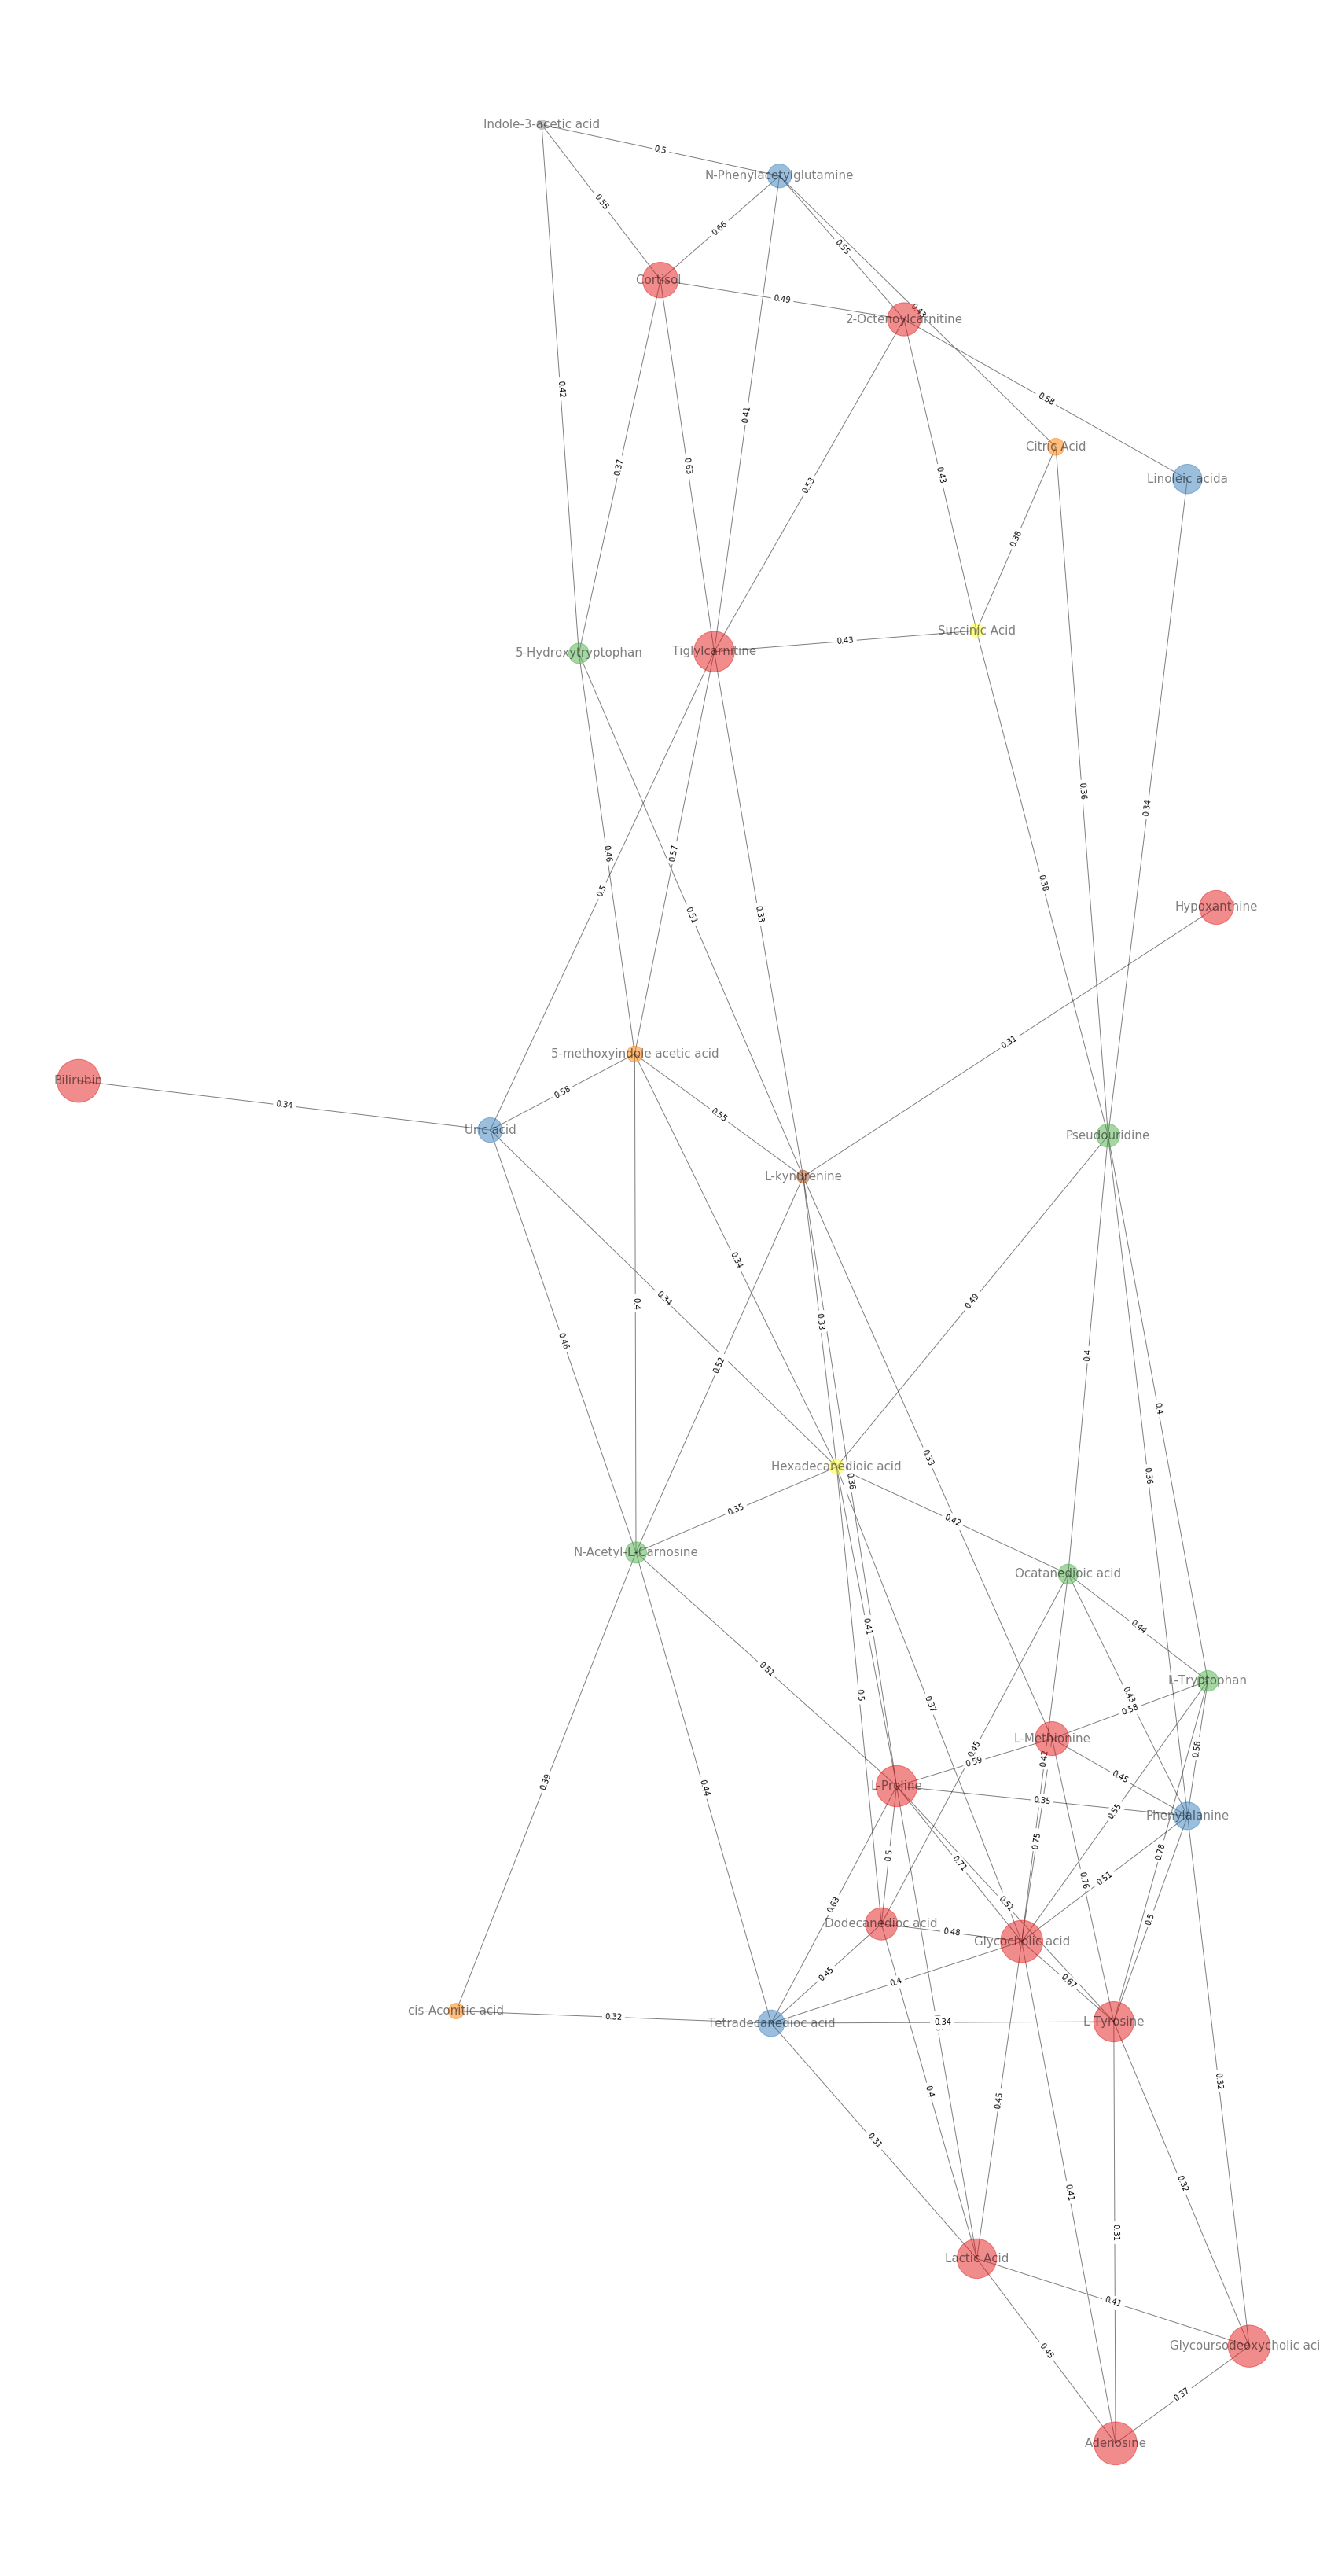

In [8]:
networkPlot = multivis.plotNetwork(g)

node_params = dict({'sizing_column': 'pvalue'                 #The column from the Peak Table to use for sizing the nodes
                    , 'sizeScale': 'reverse_linear'           #The scale to use for sizing the nodes
                    , 'size_range': (150,3000)                #The size range for the nodes
                    , 'alpha': 0.5                            #The alpha opacity value for the nodes
                    , 'nodeLabels': True                      #If setting to 'True' labels the nodes
                    , 'fontSize': 15                          #The font size of the labels on the nodes
                    , 'keepSingletons': False})               #If setting to 'True' keeps any single nodes not linked by edges

filter_params = dict({'column': 'pvalue'                      #The column to filter the data on
                      , 'threshold':  1.0                     #The threshold to use when filtering the data
                      , 'operator': '>'                       #The operator to apply when filtering the data
                      , 'sign': "pos"})                       #The sign of the similarities ('pos', 'neg' or 'both')

general_params = dict({'imageFileName': 'springNetwork.png'   #File name to save image to
                       , 'edgeLabels': True                   #If setting to 'True' labels the edges with the similarity score
                       , 'saveImage': True                    #If setting to 'True' saves the image
                       , 'layout': 'spring'                   #The NetworkX layout to apply ('circular', 'kamada_kawai', 'random', 'spring', 'spectral')
                       , 'dpi': 200                           #The DPI of the image
                       , 'figSize': (30,60)})                 #Figure size (width,height)

networkPlot.set_params(**general_params,**node_params,**filter_params)

networkPlot.run()

<div style="background-color:rgb(255, 250, 250); padding:10px;  border: 1px solid lightgrey; padding-left: 1em; padding-right: 1em;">

## 8.  Plot an interactive Spring-embedded Network

The NetworkX graph is then passed into D3 JavaScript to generate an interactive spring-embedded network plot embedded in HTML for interactive visualisation. The spring-embedded network plot is implmented within an undirected graph, where each node represents a metabolite and the spring constant of each edge between nodes represents the correlation coefficient. When the tension on the graph is allowed to relax and put in a low energy configuration, the springs push the nodes to their furthest allowed distance from each other in the graph layout. Where there are edges with higher correlation coefficients the spring tightens bringing nodes closer together and where there are lower correlation coefficients the spring loosens and stretches. In this was spring-embeeded network plot becomes multivariate, forming a multivariate cluster analysis method, where nodes clustered together are more positively correlated and nodes further apart are considered more negatively correlated. The inclusion of univariate statistical analysis outputs in the form of p-values and other univariate statistics provide another layer of information by illustrating such information as different sizes or colours of nodes.

Note: Colour schemes in the dropdown menu currently only consist of categorical colour schemes. This will later be expanded on to include continuous color schemes as well.

</div>

In [9]:
springNetwork = multivis.springNetwork(g)

node_params = dict({'node_text_size': 15            #The font size of the labels on the nodes
                    , 'fix_nodes': True             #If setting to 'True' nodes fix in place after manually moving them. Double click them to release.
                    , 'displayLabel': True          #If setting to 'True' the nodes are labelled with 'Label', otherwise they're labelled with 'Name'
                    , 'node_data': ['Name', 'Label', 'Mode', 'mz', 'rt', 'F', 'pvalue', 'pFDR', 'RSD', 'Dratio']}) #The node data from the Peak Table to display on hover of each node

link_params = dict({'link_type': network.getLinkType()     #The link type to use in the spring-embedded plot (value can be retrived from original generated network with getLinkType() function) 
                    , 'link_width': 0.5                    #The link width to set between nodes
                    , 'pos_score_color': 'red'             # Link score color works with both HTML/CSS name, hex code, and (R,G,B) tuples.
                    , 'neg_score_color': 'black'})         # Link score color works with both HTML/CSS name, hex code, and (R,G,B) tuples.

general_params = dict({'html_file': 'springNetwork.html'   #HTML file name to save to
                       , 'backgroundColor': 'white'        # Background color works with both HTML/CSS name, hex code, and (R,G,B) tuples.
                       , 'foregroundColor': 'black'        # Foreground color works with both HTML/CSS name, hex code, and (R,G,B) tuples.                       
                       , 'chargeStrength': -120})          #The charge strength of the spring-embedded network (force between springs)

# Dictionary of node size "scale" and "range" values for chosen columns from the Peak Table. The "scale" values can be "linear", "reverse_linear", "log", "reverse_log", "square", "reverse_square", "area", "reverse_area", "volume", or "reverse_volume"
node_size_scale = dict({'pvalue': {'scale': 'reverse_linear', 'range': [5,30]}
                        , 'pFDR':{'scale': 'reverse_linear', 'range': [10,30]}
                        , 'F': {'scale': 'log', 'range': [10,50]}
                        , 'RSD': {'scale': 'reverse_log', 'range': [5,20]}
                        , 'Dratio': {'scale': 'log', 'range': [5,20]}});

springNetwork.set_params(node_size_scale=node_size_scale,**general_params,**node_params,**link_params)

springNetwork.run()

display(Javascript('''window.open(\'{}\','spring','width=800,height=800')'''.format(general_params['html_file'])))

<IPython.core.display.Javascript object>

<div style="background-color:rgb(255, 250, 250); padding:5px;  border: 1px solid lightgrey; padding-left: 1em; padding-right: 1em;">

### Launch Dashboard

A dashboard with panels for the spring-embedded network, node data and sliders is launched in a new browser tab, allowing for a more robust interface for exploratory analysis of the data.

Note: launching in the browser is only compatible with local installations and will not work in Binder.

</div>

In [10]:
springNetwork.launchDashboard()